<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Recurrent%20Neural%20Network_Time%20Series_and_Sequence%20Data/LSTM_Long_Distance_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, SimpleRNN, LSTM, GRU, GlobalMaxPooling2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):

  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  #y = get_label(x, -1, -2, -3) #shot distance
  y= get_label(x,0,1,2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
n = len(X)


In [5]:
Y

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
i = Input(shape = (T,))
x = Dense(1, activation = 'sigmoid')(i)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.01),
    metrics=['accuracy']
)
r = model.fit(
    X,Y,
    epochs = 100,
    validation_split=0.5,
)

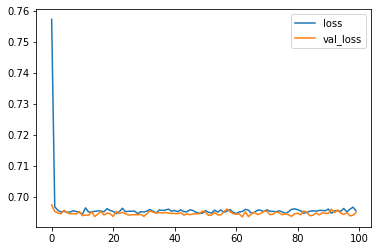

In [7]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

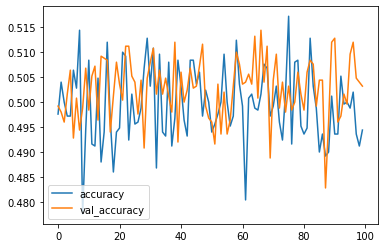

In [9]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [19]:
inputs = np.expand_dims(X,-1)
i = Input(shape = (T,D))

x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.01),
    metrics=['accuracy']
)
r = model.fit(
    inputs,Y,
    epochs = 100,
    validation_split=0.5,
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 4s 16ms/step - loss: 0.6948 - accuracy: 0.4872 - val_loss: 0.6933 - val_accuracy: 0.4936
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5076 - val_loss: 0.6935 - val_accuracy: 0.5024
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5112 - val_loss: 0.6935 - val_accuracy: 0.5036
Epoch 4/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5036 - val_loss: 0.6934 - val_accuracy: 0.4916
Epoch 5/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.4932
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5136 - val_loss: 0.6934 - val_accuracy: 0.4984
Epoch 7/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.4968 - val_loss: 0.6924 - val_accuracy: 0.5140
Epoch 8/100
79/79 [==

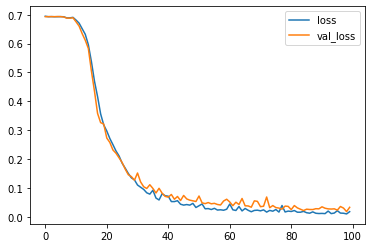

In [20]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

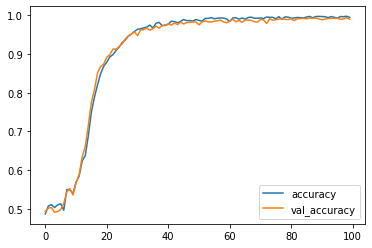

In [21]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()